In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from cyberbullying.data import Data
from cyberbullying.models import MLModel
from cyberbullying.utils import conf_mx_all

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [4]:
import joblib

In [6]:
from sklearn import set_config
set_config(display='diagram')

In [7]:
data = Data().get_data(datasets='all')

dict_keys(['toxicity', 'aggression', 'twitter', 'twitter_racism', 'twitter_sexism', 'youtube', 'kaggle'])
['toxicity', 'aggression', 'twitter', 'twitter_racism', 'twitter_sexism', 'youtube', 'kaggle']


In [8]:
data

,text,target
0,This: :One can make an analogy in mathematical...,0.0
1,` :Clarification for you (and Zundark's righ...,0.0
2,Elected or Electoral? JHK,0.0
3,`This is such a fun entry. Devotchka I once...,0.0
4,Please relate the ozone hole to increases in c...,0.0
...,...,...
230944,"""Never really gave it much thought. I just fig...",0.0
230945,"""Nadie se salva de la regla 34 xd""",0.0
230946,"""Question: Are you a boy or a girl?""",0.0
230947,"""Leave your email or phone number and maybe yo...",1.0


In [9]:
percentage_used = 1
data = data.sample(frac=percentage_used, random_state=0)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data[['text']], data['target'], test_size=0.3, random_state=0)

In [11]:
X_train.head()

,text
41325,:Could I please be unblocked?
63081,**** Carlo you should not have given in to...
20725,` I have reverted a recent edit you made to th...
167785,*: I would be entirely in favor of someone m...
101388,` == Reviewer granted == Hello. Your accoun...


In [12]:
package_model = MLModel()

In [13]:
package_model.vectorizer

TfidfVectorizer(min_df=3)

In [14]:
package_model.model

LinearSVC(C=1, class_weight={0: 0.2, 1: 0.8}, dual=False, penalty='l1')

In [15]:
package_model.set_pipeline()

In [16]:
package_model.pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('cleandftransformer',
                                                                   CleanDFTransformer()),
                                                                  ('tfidfvectorizer',
                                                                   TfidfVectorizer(min_df=3))]),
                                                  ['text'])])),
                ('linearsvc',
                 LinearSVC(C=1, class_weight={0: 0.2, 1: 0.8}, dual=False,
                           penalty='l1'))])

In [17]:
from cyberbullying.transformers import CleanDFTransformer

In [18]:
X_train.shape

(161664, 1)

In [19]:
#transformer = CleanDFTransformer()

In [20]:
#X_train_2 = transformer.fit_transform(X_train)
#X_train_2

In [21]:
#X_train_2.shape

In [22]:
#X_train_2.isin([np.inf, -np.inf]).sum()

In [23]:
#X_train_2['text'].map(lambda text: type(text)).value_counts()

In [24]:
#X_train_2.isnull().sum()

In [25]:
y_train

41325     0.0
63081     0.0
20725     0.0
167785    0.0
101388    0.0
         ... 
136405    0.0
91714     0.0
180664    0.0
71438     1.0
124281    0.0
Name: target, Length: 161664, dtype: float64

In [26]:
y_train.isnull().sum()

0

In [27]:
#X_train_2['text'].sort_values()

In [28]:
#X_train_2['text'].map(lambda text: len(text)).sort_values()

In [29]:
#X_train_2.max()

In [30]:
#X_train_2.min()

In [31]:
y_train.min()

0.0

In [32]:
package_model.pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('cleandftransformer',
                                                                   CleanDFTransformer()),
                                                                  ('tfidfvectorizer',
                                                                   TfidfVectorizer(min_df=3))]),
                                                  ['text'])])),
                ('linearsvc',
                 LinearSVC(C=1, class_weight={0: 0.2, 1: 0.8}, dual=False,
                           penalty='l1'))])

In [33]:
package_model.save_model()

In [34]:
from cyberbullying.utils import clean_df

In [35]:
y_pred = package_model.predict(X_test)

In [36]:
y_pred

array([0., 1., 1., ..., 0., 0., 0.])

In [37]:
y_pred_proba = package_model.predict_proba(X_test)

In [38]:
y_pred_proba

array([[0.52688261, 0.47311739],
       [0.42627074, 0.57372926],
       [0.37960947, 0.62039053],
       ...,
       [0.67093511, 0.32906489],
       [0.5903655 , 0.4096345 ],
       [0.6428222 , 0.3571778 ]])

In [39]:
y_pred_proba[:,0]

array([0.52688261, 0.42627074, 0.37960947, ..., 0.67093511, 0.5903655 ,
       0.6428222 ])

Recall: 0.734
Precision: 0.611
Accuracy: 0.914
F1-score: 0.667


(0.734, 0.611, 0.914, 0.667)

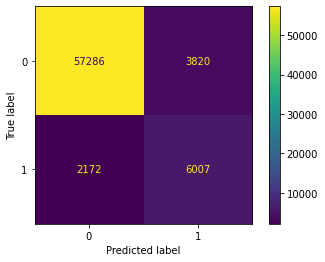

In [40]:
conf_mx_all(y_test, y_pred)

In [41]:
package_model.predict_all(X_test)

,text,proba_0,proba_1,prediction,color
216249,@mutaSawwif @TawheedNetwork_ Are you actually ...,0.526883,0.473117,0.0,None
200383,== Excuse you? == Did you just fart?,0.426271,0.573729,1.0,yellow
29777,MY IP IS DYNAMIC AND MY PENIS IS 10 INCHES LONG,0.379609,0.620391,1.0,yellow
9952,"` Hi, , Welcome to Wikipedia! I hope you l...",0.778035,0.221965,0.0,None
72162,"` Please do not vandalize pages, as you did ...",0.748132,0.251868,0.0,None
...,...,...,...,...,...
19723,"My two demands are, leave the flagship alone...",0.456701,0.543299,1.0,yellow
49595,::Note that someone tossed the page up for d...,0.663896,0.336104,0.0,None
131669,` Only thing relevant here is but ``THE' SHIT...,0.670935,0.329065,0.0,None
84864,`right about the body though it's quite possib...,0.590365,0.409635,0.0,None


In [42]:
pd.DataFrame({'text': X_test['text'], 'target': y_test})[60:80]

,text,target
137792,` ::See in my userpage the Articles I've crea...,0.0
153873,== Transnistria == The recent addition to t...,0.0
53601,` Note also that the previously highlighted t...,0.0
205335,@Damhan97 @niall_cullen @AC360 Having more chi...,1.0
213374,RT @howlintwolf I swear it's not sexist but Ch...,1.0
159241,== Skywalk / new tourist attraction == Wire...,0.0
35902,"33, 2 March 2007 (UTC) ::::::::::::You are bei...",0.0
222384,"""@nilbymouth \\n\\nYou are right concerning Ca...",0.0
146068,` :::::ETTENTIO PLEASE ::``Israeli offensive...,0.0
202625,"Saudi cleric: ""sun revolves around the earth.""...",1.0


In [43]:
X_test.loc[210727, 'text']

'@discerningmumin So if you are against slavery, you cannot be a Muslim. So why are you crying about slavery when the Quran approves it?'

In [44]:
X_test.iloc[20,:]['text']

"`  :::Why is ``per second`` the most important measurement? That little factoid is about a policy which doesn't apply per second; it applies per month. Converting it to any other time frame makes it meaningless.   /  `"

In [45]:
#texto = '`   Please do not vandalize pages, as you did with this edit to Rhode Island. If you continue to do so, you will be blocked from editing.  \xa0–\xa0 `'

In [46]:
texto = X_test.loc[210727,:]['text']

In [47]:
package_model.predict(texto)

array([1.])

In [48]:
package_model.predict_proba(texto)

array([[0.30478071, 0.69521929]])

In [49]:
package_model.predict_simple_text(texto)

,text,proba_0,proba_1,prediction,color
0,@discerningmumin,0.649911,0.350089,0.0,None
1,So,0.649911,0.350089,0.0,None
2,if,0.649911,0.350089,0.0,None
3,you,0.649911,0.350089,0.0,None
4,are,0.649911,0.350089,0.0,None
5,against,0.649911,0.350089,0.0,None
6,"slavery,",0.473745,0.526255,1.0,yellow
7,you,0.649911,0.350089,0.0,None
8,cannot,0.649911,0.350089,0.0,None
9,be,0.649911,0.350089,0.0,None


In [61]:
test_html = package_model.predict_phrase(texto)
test_html

{'prediction': 1.0,
 'text': '@discerningmumin So if you are against <yellow>slavery,</yellow> you cannot be a <orange>Muslim.</orange> So why are you crying about <yellow>slavery</yellow> when the <yellow>Quran</yellow> approves it?'}

In [51]:
#package_model.predict_all(' Your a prick. keep your personal thoughts to your self. Jeff is the best driver ever and thats a fact. You musy be an idiot redneck.')

In [52]:
#package_model.predict_simple_text(' Your a prick. keep your personal thoughts to your self. Jeff is the best driver ever and thats a fact. You musy be an idiot redneck.')

In [53]:
from cyberbullying.utils import get_trained_model, save_trained_model

In [54]:
save_trained_model(package_model)

In [55]:
trained_model = get_trained_model()

In [56]:
trained_model

In [57]:
trained_model.predict(texto)

array([1.])

In [58]:
trained_model.predict_proba(texto)

array([[0.30478071, 0.69521929]])

In [60]:
trained_model.predict_phrase(texto)

{'prediction': 1.0,
 'text': '@discerningmumin So if you are against <yellow>slavery,</yellow> you cannot be a <orange>Muslim.</orange> So why are you crying about <yellow>slavery</yellow> when the <yellow>Quran</yellow> approves it?'}